###Importing Data from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 260MB/s]
100% 1.06G/1.06G [00:05<00:00, 217MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

###Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt

###Creating Model

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=60,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=60,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(30,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(60,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(120,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 30)      840       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 30)      120       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 30)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 60)      16260     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 60)      240       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
334/334 [==============================] - 77s 193ms/step - loss: 1.2535 - accuracy: 0.5676 - val_loss: 0.7477 - val_accuracy: 0.5116
Epoch 2/10
334/334 [==============================] - 66s 196ms/step - loss: 0.6176 - accuracy: 0.6667 - val_loss: 0.5773 - val_accuracy: 0.7110
Epoch 3/10
334/334 [==============================] - 65s 194ms/step - loss: 0.5242 - accuracy: 0.7434 - val_loss: 0.5275 - val_accuracy: 0.7326
Epoch 4/10
334/334 [==============================] - 67s 198ms/step - loss: 0.4529 - accuracy: 0.7836 - val_loss: 0.4878 - val_accuracy: 0.7658
Epoch 5/10
334/334 [==============================] - 67s 198ms/step - loss: 0.3845 - accuracy: 0.8277 - val_loss: 0.4242 - val_accuracy: 0.8026
Epoch 6/10
334/334 [==============================] - 64s 190ms/step - loss: 0.3298 - accuracy: 0.8553 - val_loss: 0.4410 - val_accuracy: 0.7992
Epoch 7/10
334/334 [==============================] - 79s 235ms/step - loss: 0.2847 - accuracy: 0.8770 - val_loss: 0.6159 - val_ac

##Plotting Graphs

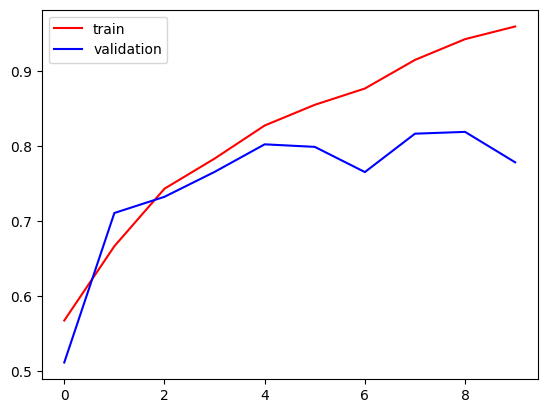

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

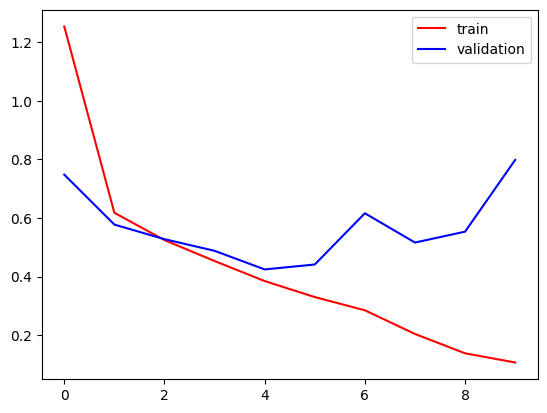

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

##Testing the Model
0 = Cat
1 = Dog

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')

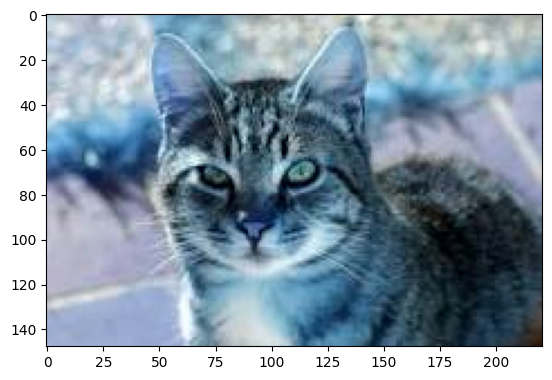

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 221, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)